## **GRIP @ The Sparks Foundation**
### **Data Science & Business Analytics Intern**

### K- Means Clustering

This notebook will walk through some of the basics of K-Means Clustering.

### Task#2 Prediction using Unsupervised ML.
From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually.

### Author: Pranav Hirani

In [34]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from sklearn import datasets
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans

In [15]:
# Load the iris dataset
df = pd.read_csv("Iris.csv")
df.head() # See the first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
df.shape

(150, 6)

150 rows and 6 columns

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [19]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [21]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

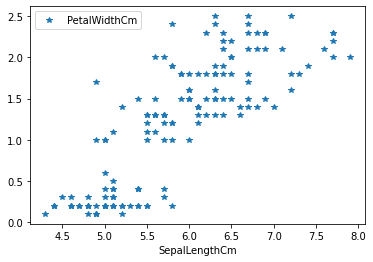

In [29]:
df.plot(x='SepalLengthCm', y='PetalWidthCm', style='*')  
plt.show()

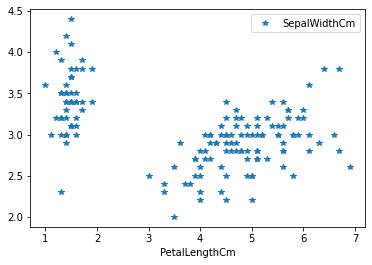

In [30]:
df.plot(x='PetalLengthCm', y='SepalWidthCm', style='*')  
plt.show()

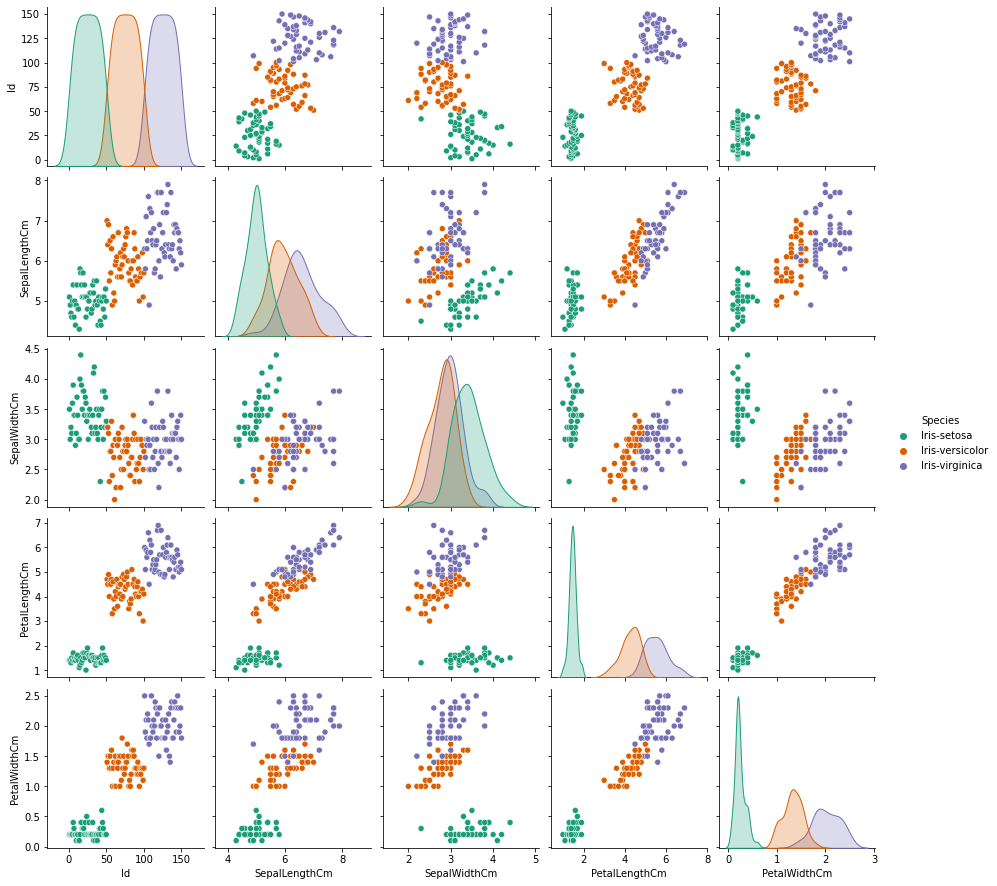

In [31]:
#above visualizations are somewhat difficult to understand and compare
sns.pairplot(df,hue='Species',palette='Dark2')

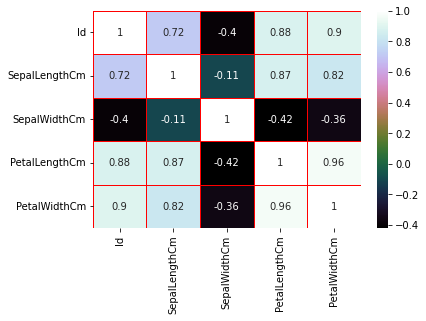

In [46]:
# Heatmap
sns.heatmap(df.corr(), linecolor = 'RED',linewidth=1, annot=True,cmap="cubehelix");

In [40]:
#From all these the easiest visualization can be none other than a 3D plot which gives perfect view of clusters
fig = px.scatter_3d(df, x='SepalLengthCm', y='SepalWidthCm', z='PetalWidthCm', color='Species' , )
fig.show()

#### How do you find the optimum number of clusters for K Means? How does one determine the value of K?

In [58]:
# Finding the optimum number of clusters for k-means classification

X = iris_df.iloc[:, [0, 1, 2, 3]].values
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [59]:
#Elbow Method to find optimum value of k
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow' 
x = np.arange(10)
y = wcss
fig = go.Figure(data=go.Scatter(x=x, y=y))
fig.update_layout(title='The Elbow Method', xaxis_title= "Number of clusters", yaxis_title= 'Within-Cluster Sum of Squares')
fig.show() 

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as ** '3**'.

In [62]:
# Applying kmeans to the dataset / Creating the kmeans classifier
#k = 3, because after 3, line is almost constant
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

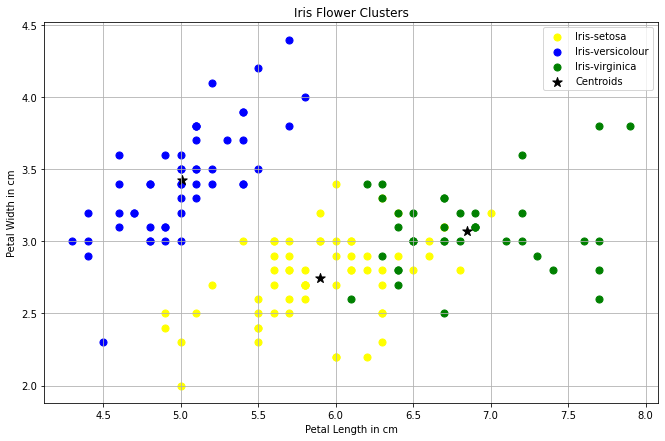

In [68]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(11,7))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],s = 50, c = 'Yellow', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],s = 50, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100,c = 'Black', marker = '*', label = 'Centroids')
plt.title('Iris Flower Clusters')
plt.ylabel('Petal Width in cm')
plt.xlabel('Petal Length in cm')
plt.legend()
plt.grid()
plt.show()

In [69]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])